In [1]:
your_local_path=""

In [2]:
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv(your_local_path + "Prostate_Cancer.csv")

In [4]:
print(df.shape)
print(df.head())
print(df.columns)

(100, 10)
   id diagnosis_result  radius  texture  perimeter  area  smoothness  \
0   1                M      23       12        151   954       0.143   
1   2                B       9       13        133  1326       0.143   
2   3                M      21       27        130  1203       0.125   
3   4                M      14       16         78   386       0.070   
4   5                M       9       19        135  1297       0.141   

   compactness  symmetry  fractal_dimension  
0        0.278     0.242              0.079  
1        0.079     0.181              0.057  
2        0.160     0.207              0.060  
3        0.284     0.260              0.097  
4        0.133     0.181              0.059  
Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')


In [5]:
df=df.drop(['id'],1)

In [21]:
features=['radius','texture','area','smoothness','perimeter','compactness','symmetry','fractal_dimension']
X=df[features]
y=df['diagnosis_result']

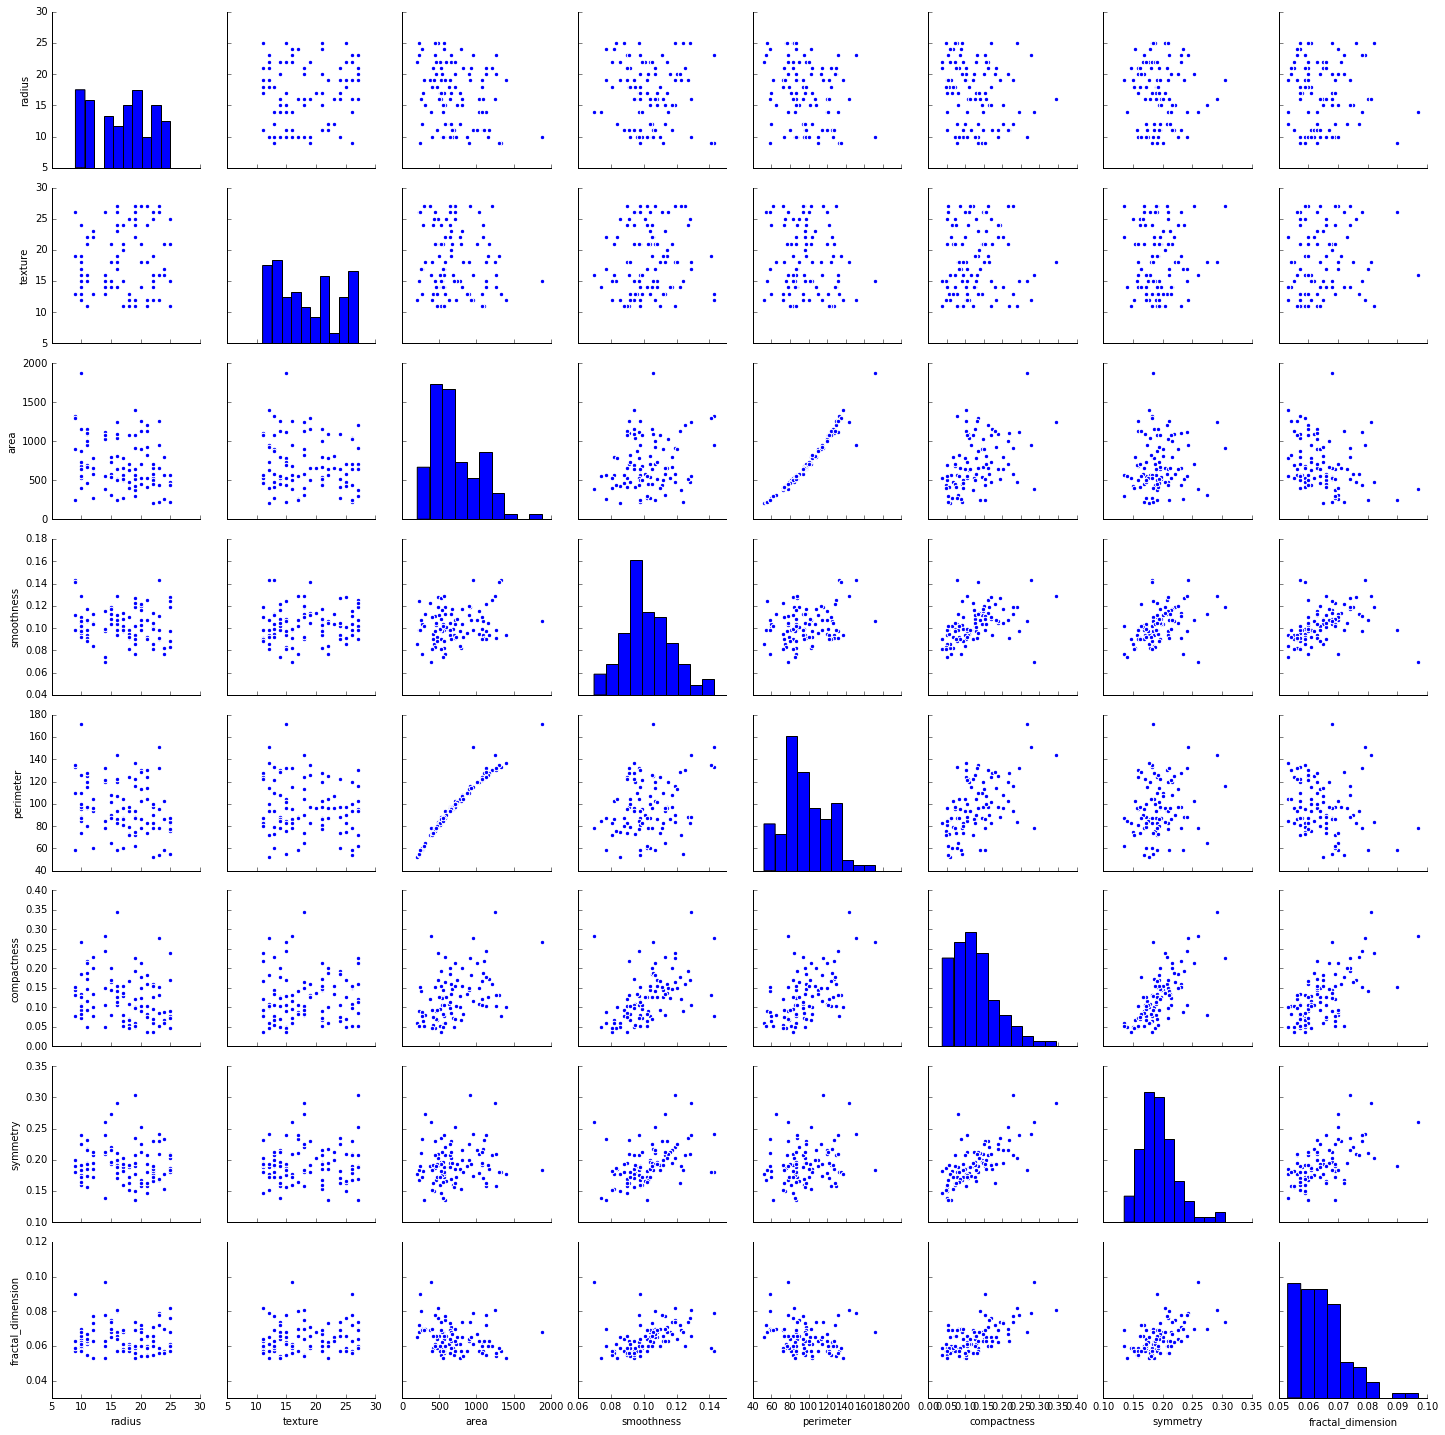

In [22]:
sns.pairplot(X,diag_kind='hist')
plt.show()

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(70, 8)
(30, 8)
(70,)
(30,)


In [26]:
knn=KNeighborsClassifier(n_neighbors=8, metric='manhattan')
knn_model=knn.fit(X_train,y_train)
print(knn_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')


In [27]:
knn_prediction=knn_model.predict(X_test)

In [28]:
print(accuracy_score(y_test,knn_prediction))
print(confusion_matrix(y_test,knn_prediction))
print(classification_report(y_test,knn_prediction))
      

0.866666666667
[[ 8  0]
 [ 4 18]]
             precision    recall  f1-score   support

          B       0.67      1.00      0.80         8
          M       1.00      0.82      0.90        22

avg / total       0.91      0.87      0.87        30

